# ChromeDriver 下載
- 下載前查看 Chrome 版本。設定 → 左上角三點 → 關於 Chrome 就會有版本囉
- https://chromedriver.chromium.org/downloads


In [1]:
#爬蟲工具
import requests 
from bs4 import BeautifulSoup

#模擬瀏覽器工具 , 因新聞網頁為動態新聞網站 , 所以要使用輔助工具不然爬不到
from selenium import webdriver

# 若要測試請刪掉三個單引號
# driver = webdriver.Chrome('../chromedriver.exe')
# driver.get('https://www.google.com')
# driver.close()

In [4]:
driver = webdriver.Chrome('./driver/chromedriver.exe')
url = 'https://www.ettoday.net/news/news-list.htm'
driver.get(url)
# 使用 selenium 開啟網頁

In [5]:
#自動往下滑
import time
for i in range(10):
    time.sleep(2)
    driver.execute_script("window.scrollTo(0, 10000);")

In [10]:
html_source = driver.page_source
soup_html = BeautifulSoup(html_source,features='html.parser')
news = []
for d in soup_html.find(class_="part_list_2").find_all('h3'):
    date = d.find(class_="date").text
    title = d.find_all('a')[-1].text
    news.append({
        'date': date,
        'title': title, 
    }) # 加入 news 字串中儲存
    print(date,title)

2020/11/08 16:33 台灣大賽／關鍵時刻沒發揮　丘總肯定選手整季貢獻
2020/11/08 16:32 台灣大賽／這球衣沒得買　兄弟、統一各一半
2020/11/08 16:32 可愛動物區看嘸羊！　牠抬頭露出「黑臉問號」笑噴網：來代班的？
2020/11/08 16:30 星座迷必收！　apm MONACO占星飾品耍高調
2020/11/08 16:29 不敢尿尿！她憋到感染…淚曝「公婆超噁習慣」：全家上一輪才能沖
2020/11/08 16:28 拿木棍「撂倒土地公」竊紅包600元　法官批賊持兇器加重判刑
2020/11/08 16:27 不想iPhone 12保護殼留下圓形印記　MagSafe清潔全攻略！
2020/11/08 16:27 小資族邁進投資第一步！　100元小額投資法大公開　
2020/11/08 16:26 娃娃機店樓上是賭場！15警拔槍衝入喊：不要動...美女荷官嚇傻
2020/11/08 16:25 謝金河：螞蟻集團上市突喊停　可能牽動中南海政局變化「3大重點」！
2020/11/08 16:25 拜登圓總統夢！韓粉狂喊「韓總再起」　朱學恒：拜託別來亂
2020/11/08 16:24 台灣大賽／佛斯特說明羅傑斯、德保拉被打　德保拉投完最後一戰
2020/11/08 16:24 秒飛北國仙境！苗栗落羽松紅了...百棵立於池中超有情調
2020/11/08 16:20 台灣大賽／猛威爾G7場邊牛棚待命　餅總：猛不是叫假的
2020/11/08 16:19 KID曝《玩很大》錄影吃飯「留位置給小鬼」：他永遠在我們心中
2020/11/08 16:14 中國恐失望！路透：拜登「抗中態度」比川普更強硬　曾稱習為惡霸
2020/11/08 16:14 愛犬走失2個月！姊妹見「熟悉身影」摀嘴痛哭　畫面感動萬人
2020/11/08 16:12 台灣大賽／獅飛起來　周思齊反制鳥類：降龍十八掌差最後一掌
2020/11/08 16:11 麗寶賽車場辦滑步車競速　300「超萌選手」上場超療癒
2020/11/08 16:11 拜登熬32年選上總統！陳揮文喊話韓國瑜　網沸騰：韓總再起！
2020/11/08 16:10 吳釗燮感謝川普：讓台灣變更強大安全　對人民而言是不朽遺產
2020/11/08 16:09 竹市人安基金會、聖光教會梯間起火　9人

In [11]:
# 資料抓完了，我們可以把瀏覽器關掉。
driver.close()

# 標籤雲

In [25]:

import csv #使用 csv 儲存
import numpy as np # import imageio 讀圖
import jieba  # 判斷是否為一個名詞 (類似字典) 中文辭典套件
from wordcloud import WordCloud, ImageColorGenerator , STOPWORDS #字雲主要套件
import matplotlib.pyplot as plt #印字雲
from PIL import Image

fn = 'cloudtext.csv'
with open(fn,'w',newline='',encoding='utf-8') as csvFile:
    csvWriter = csv.writer(csvFile)
    jieba.set_dictionary('..\\venv\Lib\site-packages\jieba\dict.txt')
    for i in range(len(news)):
        seg_list = jieba.cut(news[i]['title'])
        csvWriter.writerow(seg_list)



Building prefix dict from c:\Users\C6\Documents\GitHub\pySample\venv\Lib\site-packages\jieba\dict.txt ...
Loading model from cache C:\Users\C6\AppData\Local\Temp\jieba.u10199dbba55b2dd3b741ff3afa423666.cache
Loading model cost 0.670 seconds.
Prefix dict has been built successfully.


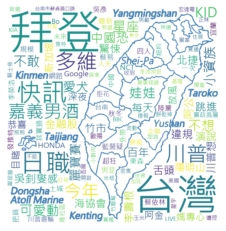

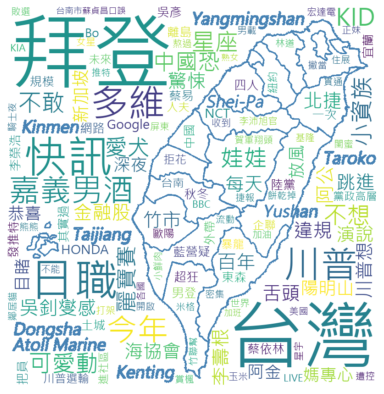

In [33]:
your_list = []
with open('cloudtext.csv', 'r',encoding='utf-8') as f:
    reader = csv.reader(f)
    your_list = '\t'.join([i[0] for i in reader])

font = r'msjh.ttc'
# 這邊可以更改你想要看到的畫面
mask = np.array(Image.open('img/Taiwan3.png'))

stopwords = set(STOPWORDS)
stopwords.add("said")

wc = WordCloud(font_path=font,background_color="white", max_words=2000, mask=mask,
               stopwords=stopwords, contour_width=3, contour_color='steelblue')

# generate word cloud
wc.generate(your_list)

# store to file
wc.to_file('img/test.png')

# show
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.figure(figsize=[7,7])
plt.imshow(wc, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis("off")
plt.show()
